C:\Users\User\AppData\Local\Temp\ipykernel_9256\453844530.py:42: RuntimeWarning: overflow encountered in power
  return a * (current_density ** b) + c


Fitted parameters:
a1 = -6.91889317754096e-09
a2 = 0.9999999840697753
b = 1.0000000064563896
c = 4.955440046895518e-06


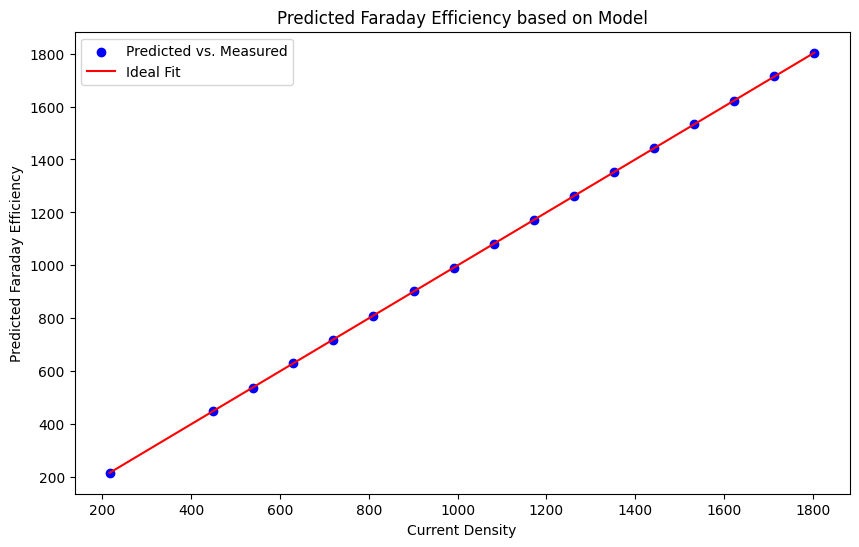

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Load the provided Excel file
file_path = 'C:\\Users\\User\\Desktop\\Internship\\Real Results\\Book1.xlsx'  # Replace with the path to your file
data = pd.read_excel(file_path)

# Rename columns based on the data structure
data.columns = [
    "Power_Level", "Voltage", "Current", "Surface_Area_Membrane", "Hydrogen_Volume_Flow", 
    "Valve_Output", "Temperature", "Pressure", "Voltage_Cell", "Current_Density",
    "Current_Cell", "Real_Hydrogen_Volume_Flow", "Real_Hydrogen_Mass_Flow", "Hydrogen_Flow_g_s",
    "Real_Hydrogen_Flow_mol_s", "Voltage_Efficiency", "Faraday_Efficiency", "Cell_Efficiency", 
    "Power", "Overall_Efficiency"
]

# Drop the first row with labels and reset index
data = data.drop(0).reset_index(drop=True)

# Convert columns to numeric types
data["Current"] = pd.to_numeric(data["Current"], errors="coerce")
data["Surface_Area_Membrane"] = pd.to_numeric(data["Surface_Area_Membrane"], errors="coerce")
data["Pressure"] = pd.to_numeric(data["Pressure"], errors="coerce")

# Calculate Current Density
data["Current_Density"] = data["Current"] / data["Surface_Area_Membrane"]

# Remove rows with NaN or infinite values in critical columns
data_clean = data.dropna(subset=["Current_Density", "Pressure"])

# Prepare data for curve fitting
current_density = data_clean["Current_Density"].values
pressure = data_clean["Pressure"].values

# Define the Faraday's Efficiency model function
def faraday_efficiency_model(vars, a1, a2, b, c):
    current_density, pressure = vars
    a = a1 * pressure + a2  # Pressure-dependent 'a' value
    return a * (current_density ** b) + c

# Initial guess for parameters (these might need adjustment based on the data pattern)
initial_guess = [1.0, 1.0, -1.0, 1.0]

# Perform curve fitting
variables = (current_density, pressure)
params, covariance = curve_fit(faraday_efficiency_model, variables, current_density, p0=initial_guess, maxfev=10000)

# Extract and display fitted parameters
a1, a2, b, c = params
print(f"Fitted parameters:\na1 = {a1}\na2 = {a2}\nb = {b}\nc = {c}")

# Predict Faraday Efficiency using the fitted model
predicted_efficiency = faraday_efficiency_model(variables, a1, a2, b, c)

# Plot Measured vs. Predicted Faraday Efficiency
plt.figure(figsize=(10, 6))
plt.scatter(current_density, predicted_efficiency, color='blue', label='Predicted vs. Measured')
plt.plot([min(current_density), max(current_density)], 
         [min(current_density), max(current_density)], color='red', label='Ideal Fit')
plt.xlabel('Current Density')
plt.ylabel('Predicted Faraday Efficiency')
plt.legend()
plt.title('Predicted Faraday Efficiency based on Model')
plt.show()
